In [1]:
import pandas as pd
import numpy as np
import math
import statistics as st
import matplotlib.pyplot as plt
from scipy import stats

# Shapiro-Wilk

* Teste para verificar se a amostra é oriunda de uma população com distribuição normal
    * Utilizável para amostra com N entre 4 e 2000

In [2]:
amostra = [32,28,34,32,31,28,30,31,39,31,33,32,32,33,31,27,33,27,31,30,26,38,
           33,33,32,30,31,31,30,31,32,31,32,29,29,31,29,32,30,29,32,29,32,30]

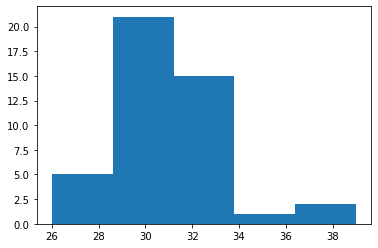

In [3]:
plt.hist(amostra,5)
plt.show() # Supondo a amostra acima, seu histograma seria o disposto abaixo

* Hipótese Nula: A amostra provém de uma população Normal
* Hipótese Alternativa: A amostra não provém de uma população Normal

In [4]:
statistic ,pvalue = stats.shapiro(amostra)

* Como p-valor < 0,05, rejeita-se a hipótese nula, decide-se rejeitar a hipotese nula, ou seja, a amostra não é oriunda de uma distribuição normal 

In [5]:
print(statistic)
print(pvalue)

0.9091466665267944
0.0021047501359134912


In [6]:
amostra = [15,16,18,19,20,22,23,23,24,24,25,28,28,29,30,30,31,32,32,34,36,36,39,46]

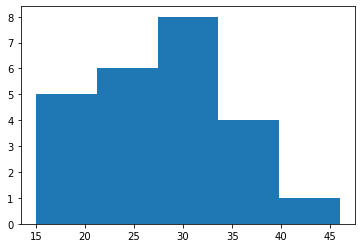

In [7]:
plt.hist(amostra,5)
plt.show() #Histograma desta segunda amostra

In [8]:
statistic ,pvalue = stats.shapiro(amostra)

* Como p-valor > 0,05, não rejeita-se a hipótese nula, assim, a amostra é oriunda de uma distribuição normal 

In [9]:
print(statistic)
print(pvalue)

0.978008508682251
0.8565154075622559


# Teste Z

* Utiliza-se quando a amostra é extraída de uma população com distribuição normal com variância conhecida ou, caso a distribuição não seja conhecida, é aplicada com amostra N>30
    * Inferência: Emprega-se para verificar se a diferença entre a média da amostra e da população é grande o suficiente para ser significante.

In [10]:
from statsmodels.stats import weightstats as stests

In [11]:
amostra = [32,28,34,32,31,28,30,31,39,31,33,32,32,33,31,27,33,27,31,30,26,38,
           33,33,32,30,31,31,30,31,32,31,32,29,29,31,29,32,30,29,32,29,32,30]

In [12]:
sum(amostra)/len(amostra) #Média da amostra é 31,06.

31.068181818181817

* Hipótese Nula: Média = 30
* Hipótese Alternativa: Média <> 30 (teste bicaudal)

In [13]:
ztest ,pval = stests.ztest(amostra, x2=None, value=30) 

* Com o p-valor <  0,05, decide-se rejeitar a hipotese nula, ou seja, a média é diferente de 30

In [14]:
print(ztest)
print(pval)

2.9222752315608385
0.003474843256018053


* Hipótese Nula: Média <= 30
* Hipótese Alternativa: Média > 30 (teste unicaudal)

In [15]:
ztest ,pval = stests.ztest(amostra, x2=None, value=30,alternative = 'larger')
print(ztest)
print(pval)

2.9222752315608385
0.0017374216280090266


* Hipótese Nula: Média >= 30
* Hipótese Alternativa: Média < 30 (teste unicaudal)

In [16]:
ztest ,pval = stests.ztest(amostra, x2=None, value=30,alternative = 'smaller')
print(ztest)
print(pval)

2.9222752315608385
0.998262578371991


* Intervalo de Confiança para a Média

In [17]:
amostra = [32,28,34,32,31,28,30,31,39,31,33,32,32,33,31,27,33,27,31,30,26,38,
           33,33,32,30,31,31,30,31,32,31,32,29,29,31,29,32,30,29,32,29,32,30]

In [18]:
raiz_n = math.sqrt(len(amostra))
media_amostral = sum(amostra)/len(amostra)
desv_pad_amostral = st.stdev(amostra)
Z_y = stats.norm.ppf(0.975) #Valor de Z para intervalo de confiança com 95% - bicaudal

In [19]:
Limite_inferior = media_amostral - (Z_y*(desv_pad_amostral/raiz_n)) #formula para calculo dos limites do intervalo
Limite_superior = media_amostral + (Z_y*(desv_pad_amostral/raiz_n))

In [20]:
print(Limite_inferior)
print(Limite_superior)

30.351754470762305
31.784609165601328


# Teste T

* Igualmente ao teste Z, é empregado para testar hipóteses acerca da estatística amostral
    * Utilizável quando não conhecemos o desvio-padrão e amostra N<30
    * Distribuição da amostra deve ser aproximadamente uma normal

In [21]:
amostra = [32,28,34,32,31,28,30,31,39,31,33,32,32,33,31,27,33,27,31,30,26,38,33,33,32]

In [22]:
sum(amostra)/len(amostra)  #Média da amostra é 31,48.

31.48

In [23]:
from scipy.stats import ttest_1samp

* Hipótese Nula: Média = 30
* Hipótese Alternativa: Média <> 30 (teste bicaudal)

In [24]:
tset, pval = ttest_1samp(amostra, 30)

* Com o p-valor < 0.05, decide-se rejeitar a hipotese nula, ou seja, a média é diferente de 30

In [25]:
print(tset)
print(pval)

2.45397516998387
0.02176629712844284


In [26]:
amostra = [30,26,30,30,31,28,30,31,33,31,31,32,32,33,31,27,33,27,31,30,26,38,31,31,30]

In [27]:
sum(amostra)/len(amostra)  #Média da amostra é 30,52.

30.52

In [28]:
tset, pval = ttest_1samp(amostra, 30)

* Com o p-value > 0,05, decide-se não rejeitar a hipotese nula, ou seja, a média é igual a 30

In [29]:
print(tset)
print(pval)

1.0256057819245223
0.3153041933128938


* Intervalo de Confiança da Média

In [30]:
amostra = [32,28,34,32,31,28,30,31,39,31,33,32,32,33,31,27,33,27,31,30,26,38,33,33,32]

In [31]:
raiz_n = math.sqrt(len(amostra))
media_amostral = sum(amostra)/len(amostra)
desv_pad_amostral = st.stdev(amostra)
T_y = stats.t.ppf(0.975, (len(amostra)-1)) #Valor de t para intervalo de confiança com 95% - bicaudal, 
# destacando o n-1 graus de liberdade

In [32]:
Limite_inferior = media_amostral - (T_y*(desv_pad_amostral/raiz_n))
Limite_superior = media_amostral + (T_y*(desv_pad_amostral/raiz_n))

In [33]:
print(Limite_inferior)
print(Limite_superior)

30.235256406596182
32.72474359340382


# Binomial

* Aplicado nos casos em que a variável de interesse é dicotômica
    * Testa-se a proporção de determinado acontecimento

* Pequenas Amostras N<25

In [34]:
df = pd.DataFrame(np.array(['A', 'A', 'A','B','A','A','B','A','B','B','A','B','A','A','A']),
                   columns=['X']) #amostra do evento com dois resultados possiveis: A e B

In [35]:
df.head()

,X
0,A
1,A
2,A
3,B
4,A


In [36]:
print(len(df['X'])) #tamanho da amostra
print(pd.value_counts(df['X'])) #contagem de cada acontecimento da amostra
print((pd.value_counts(df['X'])/len(df))) #proporcao dos acontecimentos

15
A    10
B     5
Name: X, dtype: int64
A    0.666667
B    0.333333
Name: X, dtype: float64


* Realiza-se o teste configurando:
    * Numero de sucessos (evento de interesse) - 10
    * Tamanho da amostra - 15
    * Probabilidade da hipótese nula - 0.5
    * Por padrão é um teste bicaudal, ou seja, a hipotese alternativa é que p é diferente de 0,5
* Como p-value foi 0,30 (> 0.05), não rejeitamos a hipótese nula

In [37]:
stats.binom_test(10, n=15, p=0.5)

0.30175781250000017

In [38]:
stats.binom_test(10, n=15, p=0.2)
# Considerando a hipotese nula: p= 0.2; rejeitamos esta, dado que p-valor < 0.05

0.00011322566246400012

* Grandes amostras N>25

In [39]:
df = pd.DataFrame(np.array(['A', 'A', 'A','B','A','A','B','A','B','B','A','A','A','A','A','A','A','A','A','A',
                            'B','A','B','B','A','B','A','A','A','A', 'A', 'A','B','A','A','B','A','B','B','A','A','A','A']),
                   columns=['X'])

In [40]:
print(len(df['X']))
print(pd.value_counts(df['X']))
print((pd.value_counts(df['X'])/len(df)))

43
A    31
B    12
Name: X, dtype: int64
A    0.72093
B    0.27907
Name: X, dtype: float64


In [41]:
p = 1/2 # hipotese nula (queremos testar p = 0.5)
p_ = 0.72 # proporcao do evento de interesse na amostra
N = len(df['X'])

In [42]:
Z = (abs((N*p_)-(N*p)) - 0.5)/math.sqrt(N*p*p) #calculo da estatistica por meio de uma aproximação de Z (Teste Z)

In [43]:
Z

2.732774380360275

In [44]:
Z_limite = stats.norm.ppf(0.975) #Z critico considerando um teste bicaudal com 95% de confiança

In [45]:
if Z > Z_limite or Z < -Z_limite: #verifica se o Z calculado pertence a região critica
    print('Rejeita H0')
else:
    print('Não Rejeita H0')

Rejeita H0


# Qui-quadrado

* Extensão do teste binomial, em que o evento pode apresentar mais de dois acontecimentos (A,B,C....)

In [46]:
df = pd.DataFrame(np.array(['A', 'A','C','B','C','C','B','A','B','B','A','C','A','A','A','C','A','A','A','A',
                            'B','C','C','B','C','B','C','A','A','C','A','A','B','A','C','B','C','C','B','A','A','A','A']),
                   columns=['X']) #exemplo de uma amostra do evento com acontecimentos A,B e C

In [47]:
from scipy.stats import chisquare

In [48]:
print(pd.value_counts(df['X'])) #frequencia dos acontecimentos
print((pd.value_counts(df['X'])/len(df))) #frequencia relativa dos acontecimentos

A    20
C    13
B    10
Name: X, dtype: int64
A    0.465116
C    0.302326
B    0.232558
Name: X, dtype: float64


* Por padrão, o teste calcula que os acontecimentos deveriam ter a mesma proporção (aproximadamente)
    * Vai comparar as frequencias observadas (20/13/10) com a esperada (neste caso, aproximadamente:14/14/14)
    * A hipotese nula é que não diferença significativa entre as frequencias observadas e esperadas
* p-valor > 0.05, assim, não rejeita-se a hipótese nula, portanto, não há diferenças significativas com o esperado

In [49]:
chisquare([20,13,10])

Power_divergenceResult(statistic=3.674418604651163, pvalue=0.15926125653884585)

* Ajustando as frequencias esperadas (10,20,13), teste vai comparar o observado 20/13/10 e esperado 10/20/13.
    * p-valor < 0.05, assim, rejeita-se a hipótese nula, há diferenças significativas com o esperado

In [50]:
chisquare([20,13,10],f_exp=[10,20,13])

Power_divergenceResult(statistic=13.142307692307691, pvalue=0.0014001808863745757)